# Huấn Luyện Mô Hình Nhận Diện Biển Báo Giao Thông với YOLOv8

Notebook này cung cấp một cách tương tác để huấn luyện các mô hình YOLOv8 trên tập dữ liệu biển báo giao thông.

YOLOv8 (You Only Look Once version 8) là phiên bản mới nhất của họ mô hình phát hiện đối tượng YOLO, được phát triển bởi Ultralytics. Đây là một trong những mô hình phát hiện đối tượng nhanh và chính xác nhất hiện nay, đặc biệt phù hợp cho các ứng dụng thời gian thực.

## Tính Năng

-   **Huấn luyện đa dạng các mô hình YOLOv8**: Hỗ trợ 5 phiên bản khác nhau (nano, small, medium, large, extra-large) để phù hợp với nhiều yêu cầu về tốc độ và độ chính xác
-   **Đánh giá mô hình đã huấn luyện**: Tự động đánh giá hiệu suất trên tập validation với các chỉ số mAP, Precision, Recall
-   **Dự đoán trên ảnh mới**: Kiểm thử mô hình với khả năng nhận diện biển báo giao thông trên các ảnh chưa từng thấy
-   **Cấu hình tham số tương tác**: Dễ dàng điều chỉnh các tham số huấn luyện như số epoch, batch size, learning rate ngay trong notebook


## 1. Cài Đặt Thư Viện Cần Thiết

Cài đặt thư viện Ultralytics YOLO nếu chưa được cài đặt.

Ultralytics là thư viện chính thức để sử dụng YOLOv8, cung cấp API đơn giản và mạnh mẽ cho việc huấn luyện, đánh giá và triển khai mô hình phát hiện đối tượng.


In [ ]:
!pip install ultralytics -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 46.6 MB/s eta 0:00:00


## 2. Import Thư Viện

Import các thư viện Python cần thiết để huấn luyện và đánh giá mô hình.


In [ ]:
from ultralytics import YOLO
from pathlib import Path
import os
from IPython.display import Image, display
import matplotlib.pyplot as plt

print("Running on Google Colab")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Running on Google Colab


## 3. Kết Nối Google Drive

Kết nối Google Drive của bạn để truy cập tập dữ liệu.

Google Colab cung cấp môi trường tính toán miễn phí với GPU, nhưng dữ liệu sẽ bị xóa khi phiên làm việc kết thúc. Bằng cách mount Google Drive, bạn có thể lưu trữ và truy cập dữ liệu huấn luyện cũng như kết quả một cách bền vững.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
print("Google Drive mounted successfully!")

Mounted at /content/drive
Google Drive mounted successfully!


In [ ]:
!unzip -q /content/drive/MyDrive/colab\ data/yolo_dataset.zip -d /content/

## 4. Cấu Hình Tham Số

Thiết lập các tham số huấn luyện tại đây.

Bạn có thể điều chỉnh các tham số sau để tối ưu hóa quá trình huấn luyện:

-   **model_size**: Kích thước mô hình (n=nano nhanh nhất, x=extra-large chính xác nhất)
-   **epochs**: Số lượng epoch huấn luyện (càng nhiều càng tốt nhưng có thể gây overfit)
-   **batch_size**: Số lượng ảnh trong mỗi batch (tùy thuộc vào bộ nhớ GPU)
-   **img_size**: Kích thước ảnh đầu vào (640 là tiêu chuẩn, tăng lên để tăng độ chính xác)


In [ ]:
# Training Configuration
CONFIG = {
    'model_size': 'm',           # n, s, m, l, x (nano, small, medium, large, extra-large)
    'epochs': 100,               # Number of training epochs
    'batch_size': 16,            # Batch size
    'img_size': 640,             # Input image size
    'device': 0,                 # 0 for GPU, 'cpu' for CPU
    'project': 'runs/detect',    # Project directory
    'name': 'traffic_sign_detector',  # Run name
}

# Path to data.yaml - Update this path to your dataset location in Google Drive
DATA_YAML = '/content/data.yaml'

print("Configuration:")
for key, value in CONFIG.items():
    print(f"  {key}: {value}")
print(f"\nData YAML: {DATA_YAML}")

Configuration:
  model_size: m
  epochs: 100
  batch_size: 16
  img_size: 640
  device: 0
  project: runs/detect
  name: traffic_sign_detector

Data YAML: /content/data.yaml


## 5. Kiểm Tra Tập Dữ Liệu

Kiểm tra xem tập dữ liệu đã được thiết lập đúng cách chưa.

Bước này rất quan trọng để đảm bảo cấu trúc thư mục và file cấu hình `data.yaml` được tổ chức đúng theo định dạng YOLO. Nếu có lỗi, mô hình sẽ không thể huấn luyện được.


In [ ]:
# Check if data.yaml exists
if not Path(DATA_YAML).exists():
    print(f"❌ Error: data.yaml not found at {DATA_YAML}")
    print("Please make sure your dataset is properly organized.")
    print("\nExpected structure:")
    print("yolo_dataset/")
    print("  ├── data.yaml")
    print("  ├── train/")
    print("  │   ├── images/")
    print("  │   └── labels/")
    print("  └── val/")
    print("      ├── images/")
    print("      └── labels/")
else:
    print("✅ Dataset found!")
    print(f"\nData configuration: {DATA_YAML}")

    # Display data.yaml content
    with open(DATA_YAML, 'r') as f:
        print("\n" + "="*50)
        print("data.yaml content:")
        print("="*50)
        print(f.read())

✅ Dataset found!

Data configuration: /content/data.yaml

data.yaml content:
# YOLOv8 Dataset Configuration
path: /content # dataset root dir
train: train/images # train images (relative to 'path')
val: test/images # val images (relative to 'path')
test: test/images # test images (optional)

# Classes
names:
  0: W.224
  1: W.205c
  2: P.102
  3: R.302a
  4: W.205a
  5: W.207
  6: W.201a
  7: P.123a
  8: I.434a
  9: R.303
  10: P.130
  11: I.409
  12: R.415a
  13: W.245a
  14: P.106a*Xe tải
  15: W.203c
  16: P.117*
  17: P.124a*
  18: P.107
  19: P.124d
  20: P.103a
  21: W.203b
  22: W.221b
  23: P.111
  24: P.129
  25: S.505a*Xe máy
  26: W.246a
  27: W.225
  28: S.505a*Xe tải và công
  29: P.104
  30: S.505a*Xe tải
  31: Camera
  32: P.123b
  33: W.202b
  34: B.8a
  35: P.137
  36: P.139
  37: W.205b
  38: P.127*50
  39: P.127*60
  40: P.127*80
  41: P.127*40
  42: R.301e
  43: W.239b*
  44: W.233
  45: I.407a
  46: P.131a
  47: P.124b1
  48: W.210
  49: P.124c
  50: W.201b
  51: W

## 6. Huấn Luyện Mô Hình

Bắt đầu quá trình huấn luyện mô hình YOLOv8.

Quá trình huấn luyện sẽ tự động:

-   Tải xuống trọng số pretrained từ COCO dataset
-   Áp dụng các kỹ thuật augmentation dữ liệu (mosaic, mixup, rotation, scaling...)
-   Sử dụng learning rate scheduler với cosine annealing
-   Lưu checkpoint tốt nhất dựa trên mAP50-95 trên tập validation
-   Tạo các biểu đồ theo dõi quá trình huấn luyện (loss curves, metrics)

**Lưu ý**: Quá trình này có thể mất vài giờ tùy thuộc vào kích thước mô hình và số epoch.


In [ ]:
# Load the model
model_name = f"yolov8{CONFIG['model_size']}.pt"
print(f"Loading model: {model_name}")
model = YOLO(model_name)

print("\n" + "="*70)
print("Training Configuration")
print("="*70)
print(f"Model:         YOLOv8{CONFIG['model_size']}")
print(f"Epochs:        {CONFIG['epochs']}")
print(f"Batch Size:    {CONFIG['batch_size']}")
print(f"Image Size:    {CONFIG['img_size']}")
print(f"Device:        {CONFIG['device']}")
print(f"Data Config:   {DATA_YAML}")
print("="*70)
print()

# Train the model
results = model.train(
    data=str(DATA_YAML),
    epochs=CONFIG['epochs'],
    imgsz=CONFIG['img_size'],
    batch=CONFIG['batch_size'],
    device=CONFIG['device'],
    project=CONFIG['project'],
    name=CONFIG['name'],
    patience=50,           # Early stopping patience
    save=True,             # Save checkpoints
    plots=True,            # Save plots
    val=True,              # Validate during training
    optimizer='AdamW',     # Optimizer
    lr0=0.001,             # Initial learning rate
    lrf=0.01,              # Final learning rate factor
    warmup_epochs=3,       # Warmup epochs
    cos_lr=True,           # Use cosine learning rate scheduler
    close_mosaic=10,       # Disable mosaic augmentation for last N epochs
)

print("\n" + "="*70)
print("Training Complete!")
print("="*70)

Loading model: yolov8m.pt

Training Configuration
Model:         YOLOv8m
Epochs:        100
Batch Size:    16
Image Size:    640
Device:        0
Data Config:   /content/data.yaml

Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosai

## 7. Xem Kết Quả Huấn Luyện

Hiển thị các chỉ số và biểu đồ kết quả huấn luyện.

Các biểu đồ quan trọng bao gồm:

-   **results.png**: Biểu đồ tổng hợp các metrics qua từng epoch (mAP, precision, recall, loss)
-   **confusion_matrix.png**: Ma trận nhầm lẫn giữa các class
-   **F1_curve.png**: Đường cong F1-score theo confidence threshold
-   **PR_curve.png**: Đường cong Precision-Recall
-   **P_curve.png**: Đường cong Precision theo confidence
-   **R_curve.png**: Đường cong Recall theo confidence


Results saved to: runs/detect/traffic_sign_detector
Best model: runs/detect/traffic_sign_detector/weights/best.pt
Last model: runs/detect/traffic_sign_detector/weights/last.pt

Training Plots

results.png:


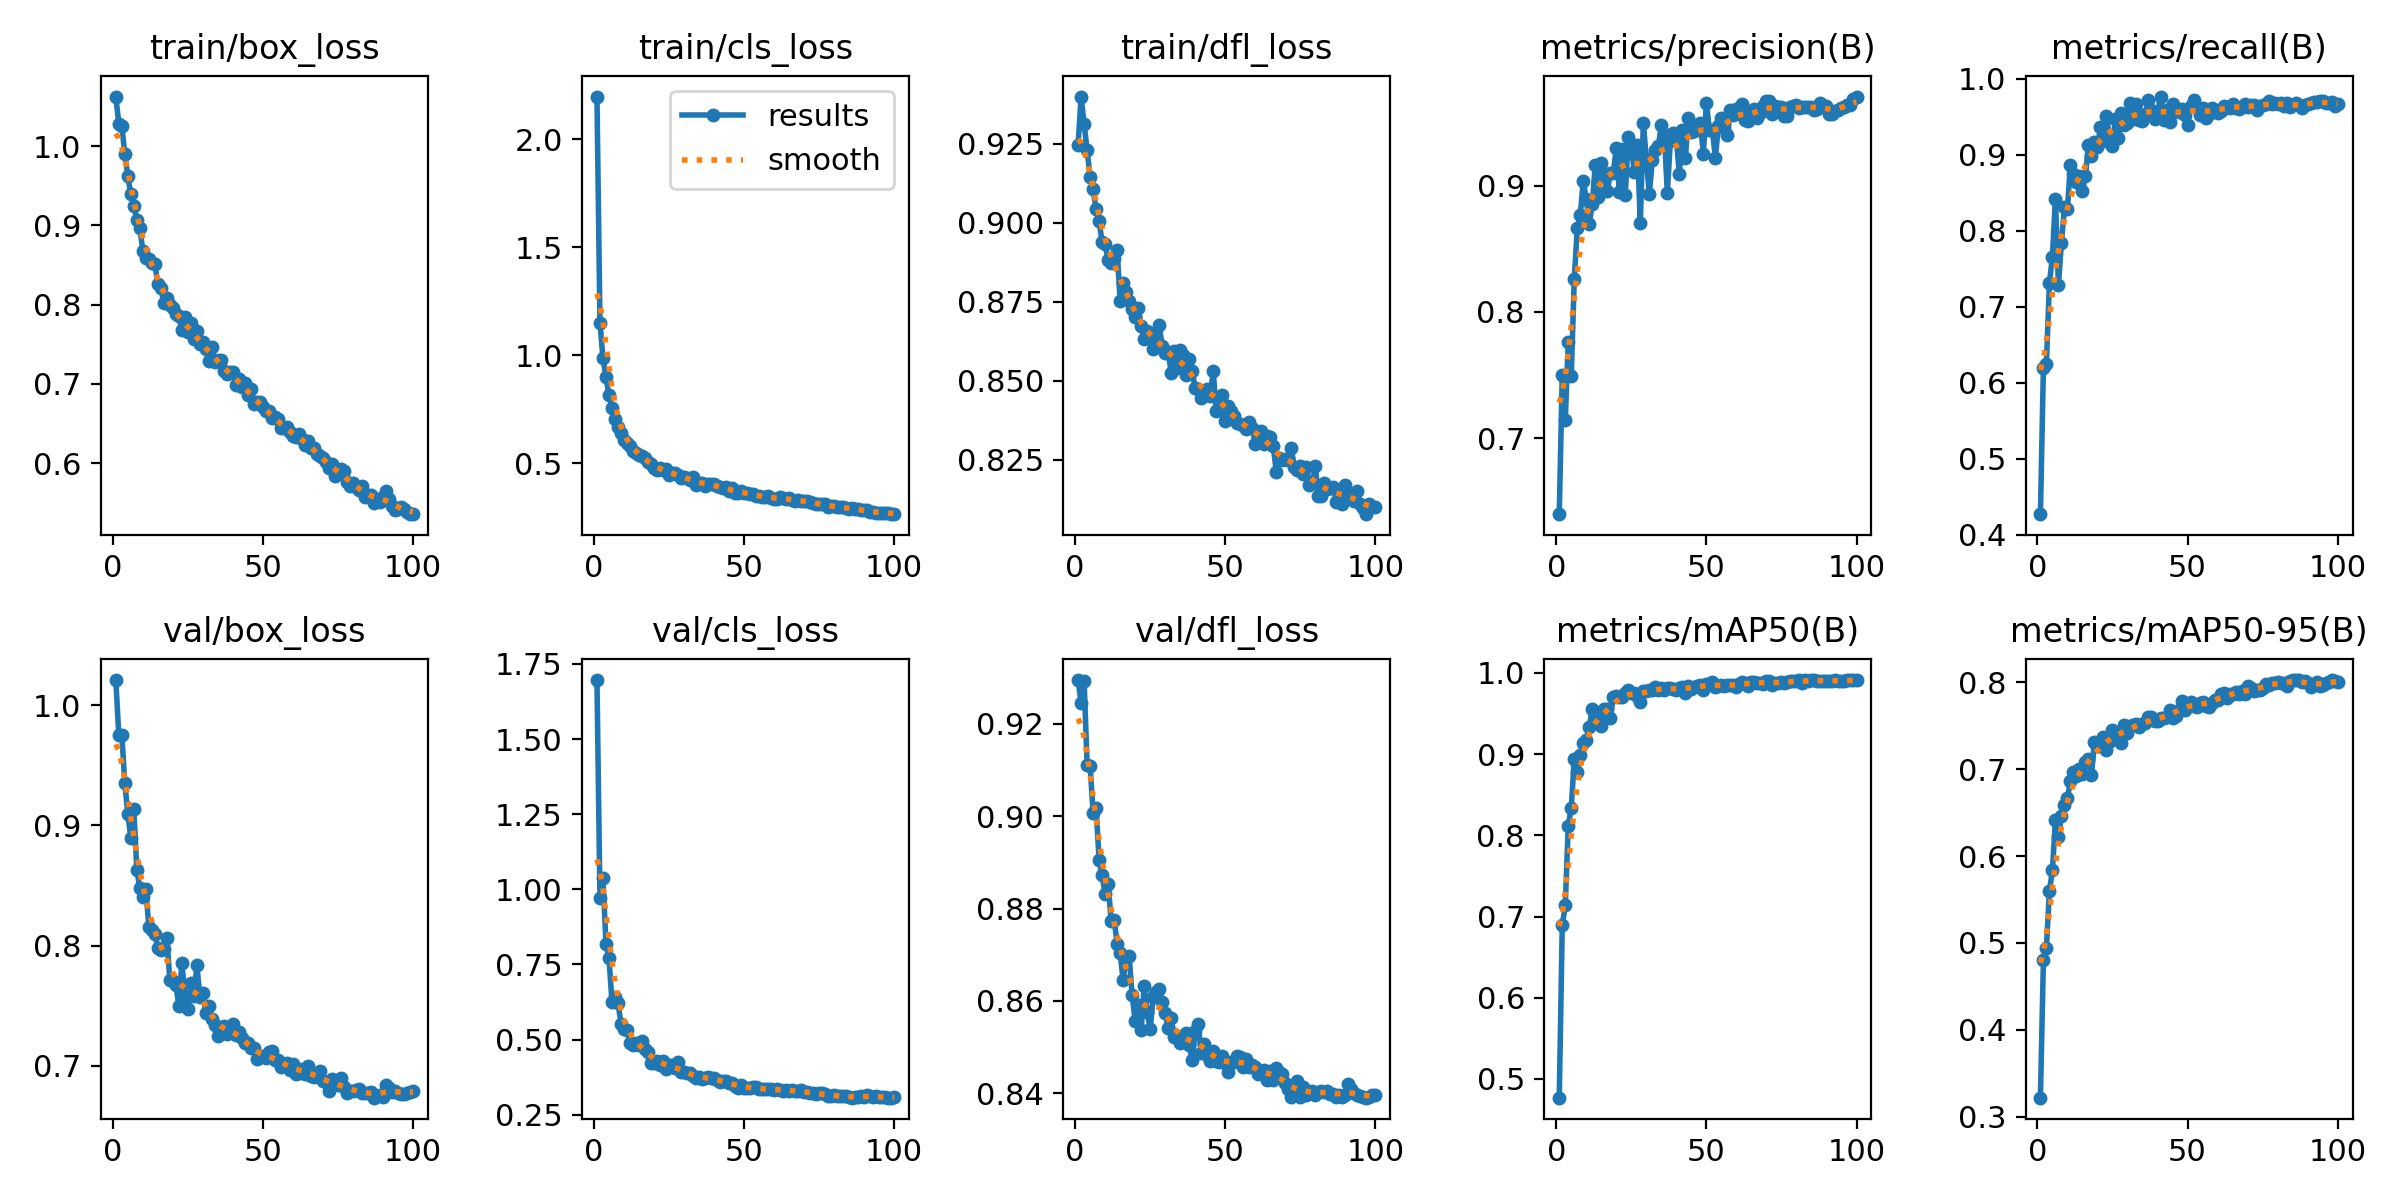


confusion_matrix.png:


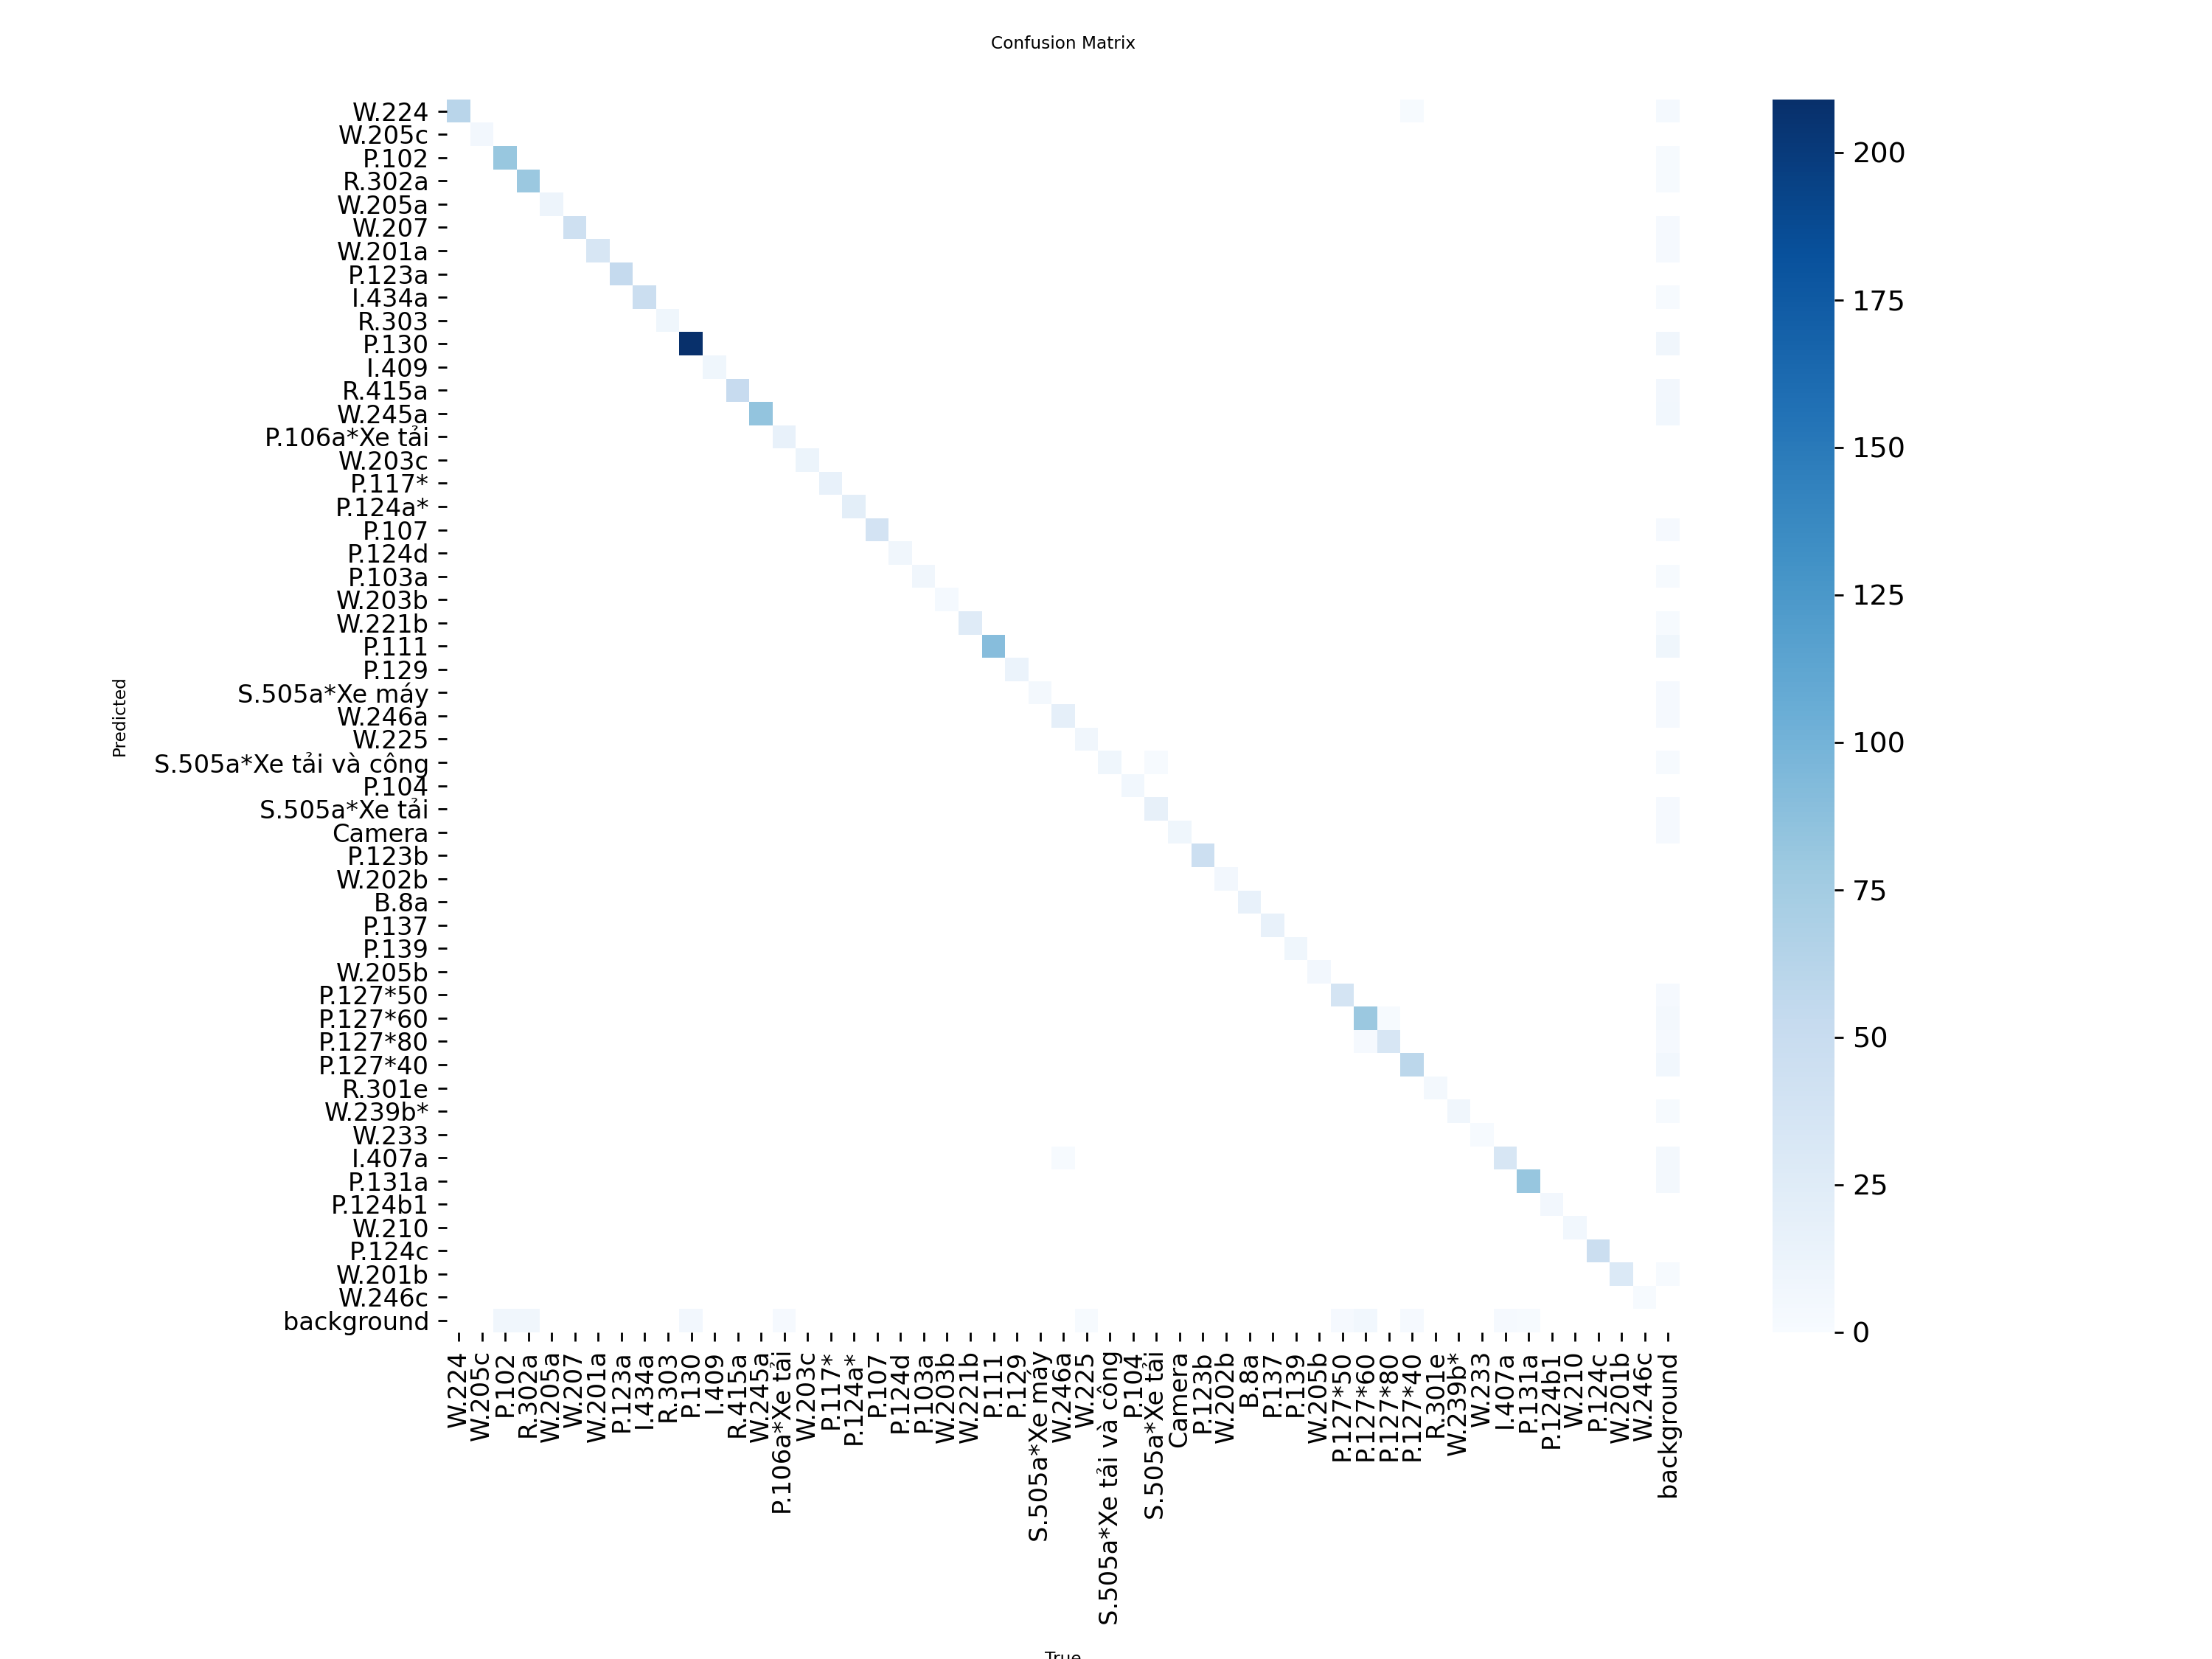


F1_curve.png: Not found

PR_curve.png: Not found

P_curve.png: Not found

R_curve.png: Not found


In [ ]:
# Path to results
results_path = Path(CONFIG['project']) / CONFIG['name']
print(f"Results saved to: {results_path}")
print(f"Best model: {results_path}/weights/best.pt")
print(f"Last model: {results_path}/weights/last.pt")

# Display training plots if they exist
plots = ['results.png', 'confusion_matrix.png', 'F1_curve.png', 'PR_curve.png', 'P_curve.png', 'R_curve.png']

print("\n" + "="*70)
print("Training Plots")
print("="*70)

for plot_name in plots:
    plot_path = results_path / plot_name
    if plot_path.exists():
        print(f"\n{plot_name}:")
        display(Image(filename=str(plot_path)))
    else:
        print(f"\n{plot_name}: Not found")

## 8. Đánh Giá Mô Hình

Đánh giá mô hình đã huấn luyện trên tập validation.

Các chỉ số đánh giá chính:

-   **mAP50**: Mean Average Precision tại IoU threshold 0.5 (chỉ số phổ biến nhất)
-   **mAP50-95**: Mean Average Precision trung bình từ IoU 0.5 đến 0.95 (chỉ số nghiêm ngặt hơn)
-   **Precision**: Tỷ lệ dự đoán đúng trong tất cả các dự đoán
-   **Recall**: Tỷ lệ phát hiện được trong tất cả các đối tượng thực tế

Mô hình tốt thường có mAP50 > 0.8 và mAP50-95 > 0.6 cho bài toán nhận diện biển báo.


In [ ]:
# Path to best model
best_model_path = Path(CONFIG['project']) / CONFIG['name'] / 'weights' / 'best.pt'

if best_model_path.exists():
    print(f"Validating model: {best_model_path}")
    print(f"Data config: {DATA_YAML}")

    model = YOLO(str(best_model_path))
    metrics = model.val(data=str(DATA_YAML))

    print("\n" + "="*70)
    print("Validation Results")
    print("="*70)
    print(f"mAP50:     {metrics.box.map50:.4f}")
    print(f"mAP50-95:  {metrics.box.map:.4f}")
    print(f"Precision: {metrics.box.mp:.4f}")
    print(f"Recall:    {metrics.box.mr:.4f}")
else:
    print(f"❌ Model not found at {best_model_path}")
    print("Please train the model first.")

Validating model: runs/detect/traffic_sign_detector/weights/best.pt
Data config: /content/data.yaml
Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,869,868 parameters, 0 gradients, 78.9 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2056.7±612.2 MB/s, size: 243.8 KB)
val: Scanning /content/test/labels.cache... 639 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 639/639 889.8Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 40/40 3.4it/s 11.8s
                   all        639       1645       0.96      0.965       0.99      0.805
                 W.224         61         61      0.952          1      0.993      0.767
                W.205c          5          5          1      0.857      0.995      0.684
                 P.102         87         88          1      0.812      0.984      0.726
                R.302a         87         

## 9. Dự Đoán Trên Ảnh Mới

Kiểm thử mô hình trên các ảnh mới.

Bước này cho phép bạn:

-   Chạy inference trên ảnh/video/webcam
-   Điều chỉnh confidence threshold để lọc các detection kém tin cậy
-   Điều chỉnh IoU threshold cho Non-Maximum Suppression (NMS) để loại bỏ các bounding box trùng lặp
-   Lưu kết quả dự đoán dưới dạng ảnh có annotation và file text chứa tọa độ

**Lưu ý**: Cập nhật đường dẫn `source` để trỏ đến ảnh/video cần kiểm thử trước khi chạy.


In [ ]:
# Prediction Configuration
PREDICT_CONFIG = {
    'model_path': str(Path(CONFIG['project']) / CONFIG['name'] / 'weights' / 'best.pt'),
    'source': 'path/to/test/image.jpg',  # Change this to your test image path
    'conf': 0.25,        # Confidence threshold
    'iou': 0.45,         # NMS IoU threshold
    'save_dir': 'predictions'
}

# Update the source path here
print("Update PREDICT_CONFIG['source'] with your test image path before running!")
print(f"\nCurrent configuration:")
for key, value in PREDICT_CONFIG.items():
    print(f"  {key}: {value}")

In [ ]:
# Run predictions
if Path(PREDICT_CONFIG['model_path']).exists():
    print(f"Making predictions with: {PREDICT_CONFIG['model_path']}")
    print(f"Source: {PREDICT_CONFIG['source']}")

    model = YOLO(PREDICT_CONFIG['model_path'])
    results = model.predict(
        source=PREDICT_CONFIG['source'],
        save=True,
        save_txt=True,      # Save predictions as text
        save_conf=True,     # Save confidence scores
        conf=PREDICT_CONFIG['conf'],
        iou=PREDICT_CONFIG['iou'],
        project=PREDICT_CONFIG['save_dir'],
    )

    print(f"\nPredictions saved to: {PREDICT_CONFIG['save_dir']}")

    # Display results
    for result in results:
        # Display the annotated image
        img_array = result.plot()
        plt.figure(figsize=(12, 8))
        plt.imshow(img_array[..., ::-1])  # Convert BGR to RGB
        plt.axis('off')
        plt.title('Predictions')
        plt.show()

        # Print detection details
        if len(result.boxes) > 0:
            print(f"\nDetected {len(result.boxes)} objects:")
            for i, box in enumerate(result.boxes):
                cls = int(box.cls[0])
                conf = float(box.conf[0])
                print(f"  {i+1}. Class: {result.names[cls]}, Confidence: {conf:.2f}")
        else:
            print("\nNo objects detected.")
else:
    print(f"❌ Model not found at {PREDICT_CONFIG['model_path']}")
    print("Please train the model first.")

## 10. Xuất Mô Hình (Tùy Chọn)

Xuất mô hình sang các định dạng khác nhau (ONNX, TFLite, v.v.) để triển khai.

YOLOv8 hỗ trợ xuất sang nhiều định dạng:

-   **ONNX**: Định dạng universal, hỗ trợ hầu hết các framework (TensorRT, OpenVINO, v.v.)
-   **TorchScript**: Để deploy với PyTorch C++
-   **TFLite**: Cho các thiết bị mobile (Android/iOS)
-   **CoreML**: Tối ưu cho thiết bị Apple (iPhone, iPad, Mac)
-   **OpenVINO**: Tối ưu cho Intel CPU/GPU/VPU
-   **TensorRT**: Tối ưu cho NVIDIA GPU

Việc xuất mô hình giúp tăng tốc độ inference và giảm kích thước model khi triển khai production.


In [ ]:
# Export to ONNX format
best_model_path = Path(CONFIG['project']) / CONFIG['name'] / 'weights' / 'best.pt'

if best_model_path.exists():
    model = YOLO(str(best_model_path))

    # Export options: 'onnx', 'torchscript', 'tflite', 'coreml', 'saved_model', etc.
    export_format = 'onnx'  # Change this to your desired format

    print(f"Exporting model to {export_format.upper()} format...")
    model.export(format=export_format)
    print("✅ Export complete!")
else:
    print(f"❌ Model not found at {best_model_path}")

## 11. Tải Kết Quả Về Máy (Dành cho Colab)

Tải xuống các mô hình đã huấn luyện và kết quả về máy tính cá nhân.

Bước này sẽ:

-   Nén toàn bộ thư mục kết quả (weights, plots, predictions) thành file .zip
-   Tự động tải xuống file zip về máy của bạn
-   Giúp bạn lưu trữ kết quả huấn luyện để sử dụng sau này

**Quan trọng**: Luôn tải kết quả về trước khi đóng Colab session để tránh mất dữ liệu!


In [ ]:
from google.colab import files
import shutil

# Create a zip file of the results
results_path = Path(CONFIG['project']) / CONFIG['name']
if results_path.exists():
    zip_path = f"{CONFIG['name']}_results"
    print(f"Creating zip file: {zip_path}.zip")
    shutil.make_archive(zip_path, 'zip', results_path)

    print("Downloading results...")
    files.download(f"{zip_path}.zip")
    print("✅ Download complete!")
else:
    print(f"❌ Results not found at {results_path}")

Creating zip file: traffic_sign_detector_results.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Download complete!
